In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
"""AVG SALARY PER JOB TITLE"""
df_avg = pd.read_csv("avg_salary_per_job_title.csv")
df_avg

,job_category,average_salary
0,Data Scientist,108.9
1,Data Engineer,102.9
2,Other,91.3
3,Data Analyst,74.4


In [4]:
"""TOP 10 HIGHEST SALARIES"""
df_salary = pd.read_csv("salary_per_job_title.csv")
df_s_10 = df_salary[0:11]
df_s_10

,Yearly_Salary,job_category
0,254.0,Data Scientist
1,237.5,Data Scientist
2,232.5,Data Scientist
3,225.0,Data Scientist
4,221.5,Data Scientist
5,205.0,Data Engineer
6,194.5,Data Analyst
7,194.0,Data Scientist
8,184.5,Data Scientist
9,181.0,Data Engineer


In [5]:
"""MAX AND MIN SALARIES PER JOB TITLE"""
df_minmax = pd.read_csv("min_max_salary.csv")
df_minmax

,job_category,minimum_salary,maximum_salary
0,Data Analyst,13.5,194.5
1,Data Engineer,26.5,205.0
2,Data Scientist,15.5,254.0
3,Other,48.0,129.5


C:\Users\João Monteiro\AppData\Local\Temp\ipykernel_26460\1840797824.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=True)


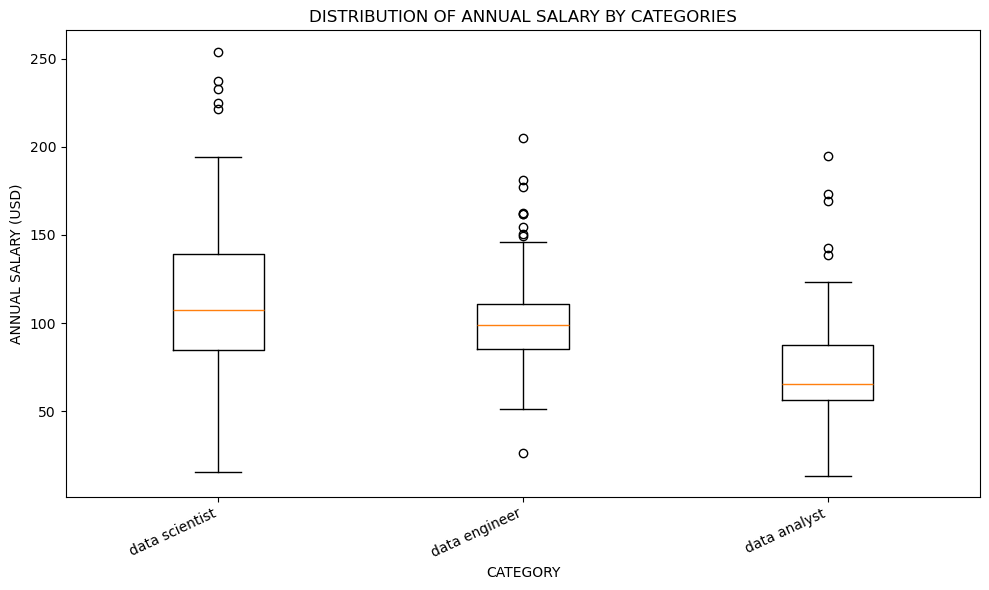

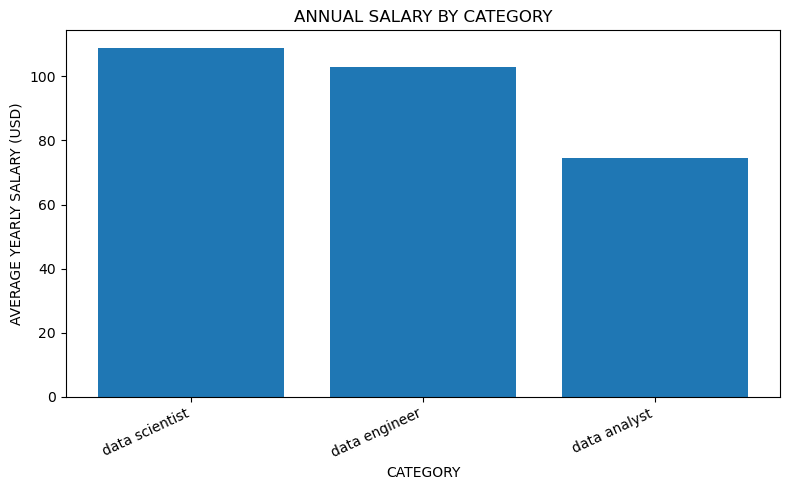

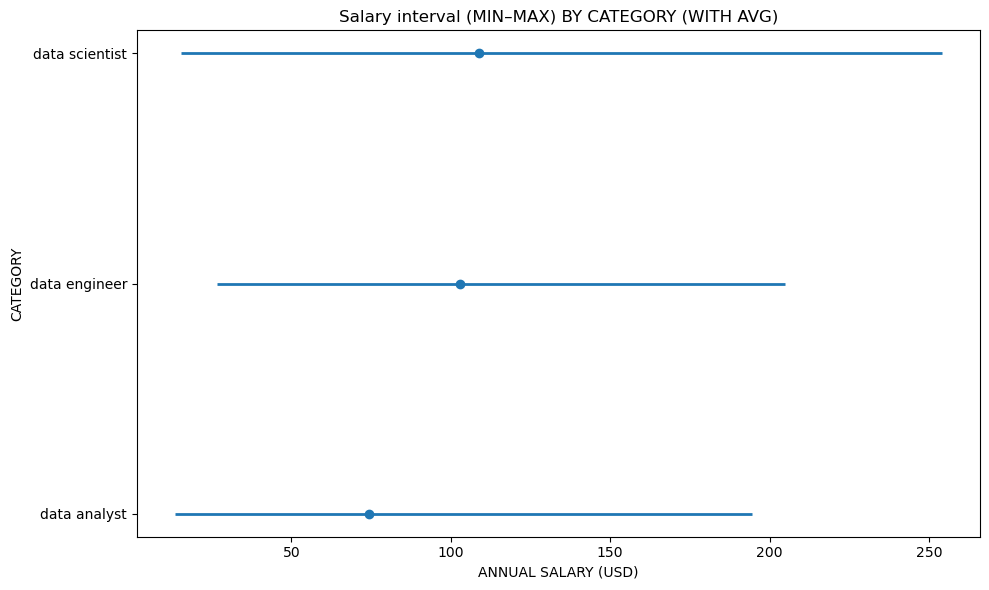

In [12]:
order = (
    df_avg.sort_values("average_salary", ascending=False)["job_category"]
    .tolist()
)

df_salary = df_salary[df_salary["job_category"] != "Other"]
df_avg    = df_avg[df_avg["job_category"] != "Other"]
df_minmax = df_minmax[df_minmax["job_category"] != "Other"]

data = [df_salary.loc[df_salary["job_category"] == cat, "Yearly_Salary"].dropna().values for cat in order]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=order, showfliers=True)
plt.title("DISTRIBUTION OF ANNUAL SALARY BY CATEGORIES")
plt.xlabel("CATEGORY")
plt.ylabel("ANNUAL SALARY (USD)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()



df_avg_sorted = df_avg.sort_values("average_salary", ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(df_avg_sorted["job_category"], df_avg_sorted["average_salary"])
plt.title("ANNUAL SALARY BY CATEGORY")
plt.xlabel("CATEGORY")
plt.ylabel("AVERAGE YEARLY SALARY (USD)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()



df_range = df_minmax.merge(df_avg, on="job_category", how="left")

df_range = df_range.sort_values("average_salary", ascending=True).reset_index(drop=True)

y = range(len(df_range))
xmin = df_range["minimum_salary"].values
xmax = df_range["maximum_salary"].values
xavg = df_range["average_salary"].values

plt.figure(figsize=(10, 6))


plt.hlines(y=y, xmin=xmin, xmax=xmax, linewidth=2)


plt.plot(xavg, y, marker="o", linestyle="None")

plt.yticks(list(y), df_range["job_category"])
plt.title("Salary interval (MIN–MAX) BY CATEGORY (WITH AVG)")
plt.xlabel("ANNUAL SALARY (USD)")
plt.ylabel("CATEGORY")
plt.tight_layout()
plt.show()
